<a href="https://colab.research.google.com/github/KT421/Data201/blob/main/Data201Proj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 - Decision Trees
DATA201 - Project 2   
Katelyn Schreyer

## Data selection

Mushroom classification dataset: https://www.kaggle.com/uciml/mushroom-classification

Dataset containing 8125 rows. All are categorical variables about mushroom shape, size, and other features. 

```
Attribute Information: (classes: edible=e, poisonous=p)
cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
bruises: bruises=t,no=f
odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
gill-attachment: attached=a,descending=d,free=f,notched=n
gill-spacing: close=c,crowded=w,distant=d
gill-size: broad=b,narrow=n
gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
stalk-shape: enlarging=e,tapering=t
stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
veil-type: partial=p,universal=u
veil-color: brown=n,orange=o,white=w,yellow=y
ring-number: none=n,one=o,two=t
ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
Attribute Information: (classes: edible=e, poisonous=p)
cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
bruises: bruises=t,no=f
odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
gill-attachment: attached=a,descending=d,free=f,notched=n
gill-spacing: close=c,crowded=w,distant=d
gill-size: broad=b,narrow=n
gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
stalk-shape: enlarging=e,tapering=t
stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
veil-type: partial=p,universal=u
veil-color: brown=n,orange=o,white=w,yellow=y
ring-number: none=n,one=o,two=t
ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
```



## Questions: 

Which mushrooms are edible? Which features are most useful in determining the status of a mushroom?

In [7]:
#read in data 
#mount google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np

mushrooms = pd.read_table('/content/drive/My Drive/Colab Notebooks/Data201/mushrooms.csv',sep=",")
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


# EDA



Text(0.5, 1.0, 'Edible vs Poisonous Mushrooms')

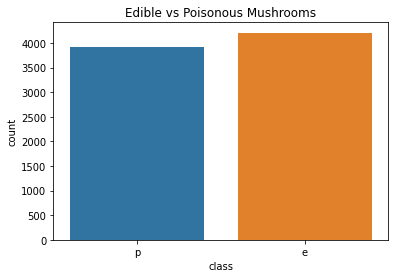

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class',data=mushrooms).set_title('Edible vs Poisonous Mushrooms')

Text(0.5, 1.0, 'Mushrooms Cap Shapes')

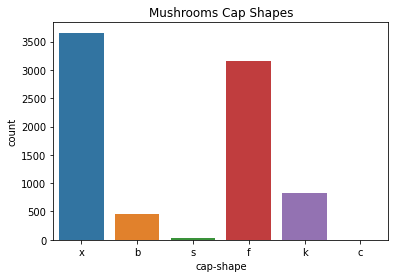

In [ ]:
sns.countplot(x='cap-shape',data=mushrooms).set_title('Mushrooms Cap Shapes')

Text(0.5, 1.0, 'Mushrooms Cap Shapes')

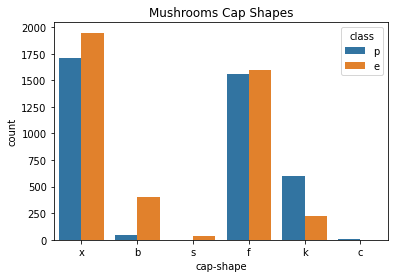

In [ ]:
sns.countplot(x='cap-shape',data=mushrooms,hue="class").set_title('Mushrooms Cap Shapes vs Class')

Text(0.5, 1.0, 'Mushrooms Habitat vs Class')

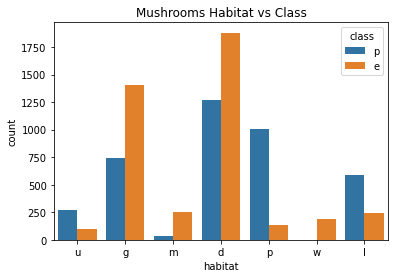

In [ ]:
sns.countplot(x='habitat',data=mushrooms,hue="class").set_title('Mushrooms Habitat vs Class')

# Build Model - Decision Tree



In [9]:
#one-hot encoding
#since there are no quantitative variables, no need to scale
mushrooms = pd.get_dummies(mushrooms)
mushrooms.head()

#identifying target variable
labels = np.array(mushrooms['class_e'])

mushrooms = mushrooms.drop('class_e',axis=1)
mushrooms = mushrooms.drop('class_p',axis=1) #this was generated by one-hot encoding but because it's the complement to class_e the tree can predict by that alone. Which is cheating.

mushroom_features = list(mushrooms.columns)

mushrooms = np.array(mushrooms)

In [10]:
#split into train and test
from sklearn.model_selection import train_test_split

train_mushrooms, test_mushrooms, train_labels, test_labels = train_test_split(mushrooms, labels, test_size = 0.25, random_state = 42)

In [ ]:
print(train_mushrooms.shape)
print(test_mushrooms.shape)
print(train_labels.shape)
print(test_labels.shape)

(6093, 117)
(2031, 117)
(6093,)
(2031,)


In [11]:
#build tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(train_mushrooms, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


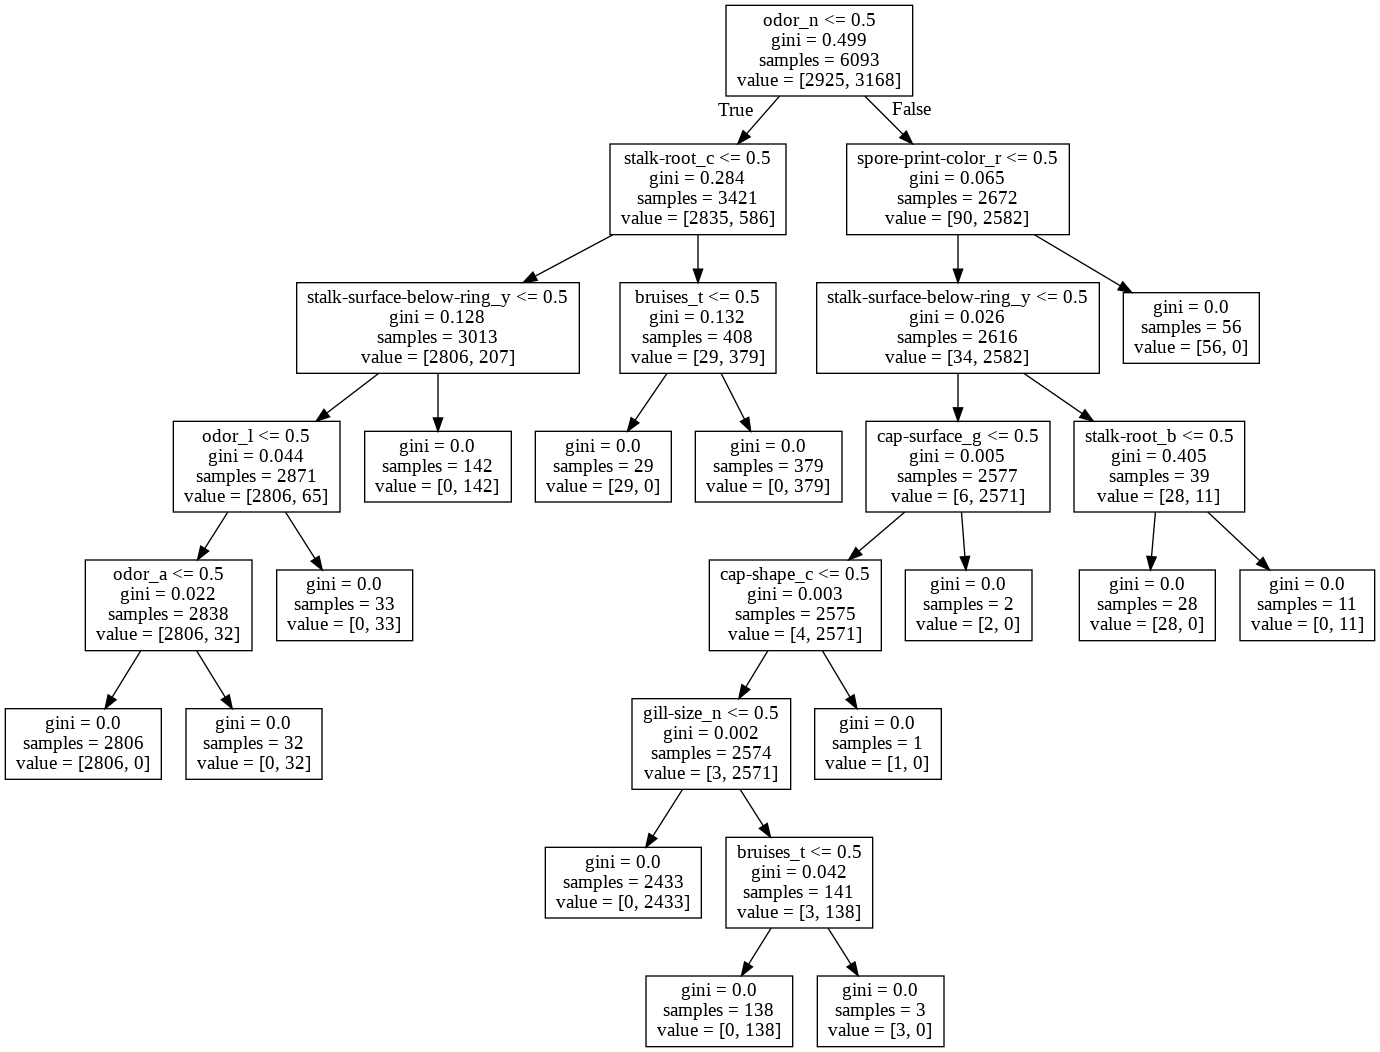

In [12]:
#look at the tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image 
from pydot import graph_from_dot_data

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=mushroom_features)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [15]:
#Evaluate the predictions
from sklearn.metrics import confusion_matrix

e_pred = dt.predict(test_mushrooms)
edible = np.array(test_labels)
predictions = np.array(e_pred)
confusion_matrix(edible, predictions)

array([[ 991,    0],
       [   0, 1040]])

Mushroom ediblity is a straightforward problem, so it's reasonable that it the tree was able to reach 100% accuracy. A trained and experienced forager can also reach 100% accuracy by memorizing a version of this decision tree.

In [21]:
#predictions with probabilities
e_pred_prob = dt.predict_proba(test_mushrooms)
e_pred_prob

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])